In [1]:
import seaborn as sns
import pandas as pd

In [2]:
penguins = sns.load_dataset("penguins")

In [3]:
print(penguins.head(10))


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   
6  Adelie  Torgersen            38.9           17.8              181.0   
7  Adelie  Torgersen            39.2           19.6              195.0   
8  Adelie  Torgersen            34.1           18.1              193.0   
9  Adelie  Torgersen            42.0           20.2              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
5       3650.0    Male  
6       36

In [4]:
print("\nShape of the dataset:", penguins.shape)


Shape of the dataset: (344, 7)


In [5]:
print("\nColumn Names and Data Types:\n", penguins.dtypes)


Column Names and Data Types:
 species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


In [6]:
print("\nMissing Values Count:\n", penguins.isnull().sum())


Missing Values Count:
 species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [7]:
print("\nSummary Statistics of Numerical Columns:\n", penguins.describe())



Summary Statistics of Numerical Columns:
        bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000


In [8]:
for col in penguins.select_dtypes(include=['object']).columns:
    print(f"{col}: {penguins[col].unique()}")

species: ['Adelie' 'Chinstrap' 'Gentoo']
island: ['Torgersen' 'Biscoe' 'Dream']
sex: ['Male' 'Female' nan]


In [9]:
import matplotlib.pyplot as plt
import numpy as np

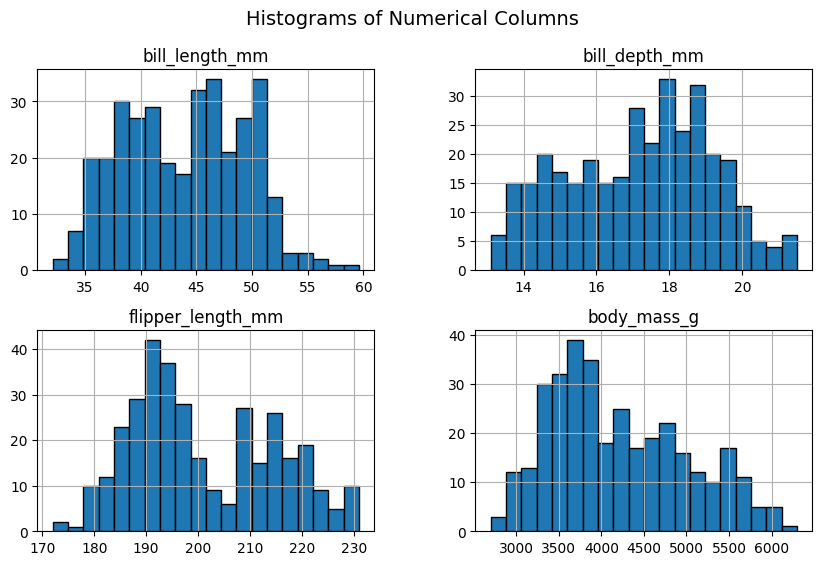

In [10]:
penguins.hist(figsize=(10, 6), bins=20, edgecolor="black")
plt.suptitle("Histograms of Numerical Columns", fontsize=14)
plt.show()


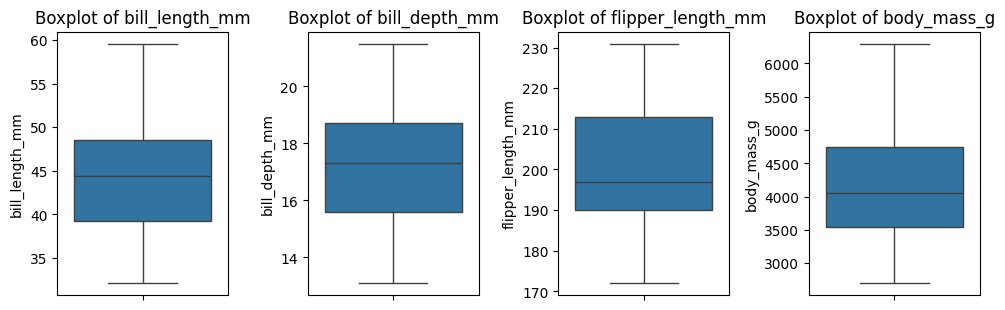

In [12]:
num_cols = penguins.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 4, i)  # Adjust rows and columns if needed
    sns.boxplot(y=penguins[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

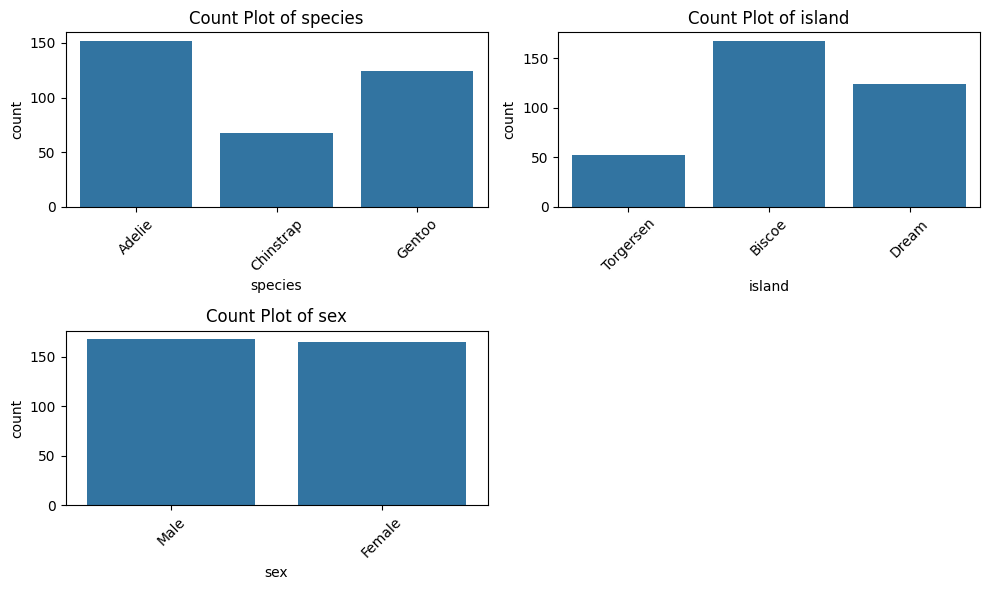

In [13]:
cat_cols = penguins.select_dtypes(include=['object']).columns
plt.figure(figsize=(10, 6))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)  # Adjust rows and columns if needed
    sns.countplot(x=penguins[col])
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
skewness = penguins[num_cols].skew()
print("\nSkewness of Numerical Columns:\n", skewness)


Skewness of Numerical Columns:
 bill_length_mm       0.053118
bill_depth_mm       -0.143465
flipper_length_mm    0.345682
body_mass_g          0.470329
dtype: float64


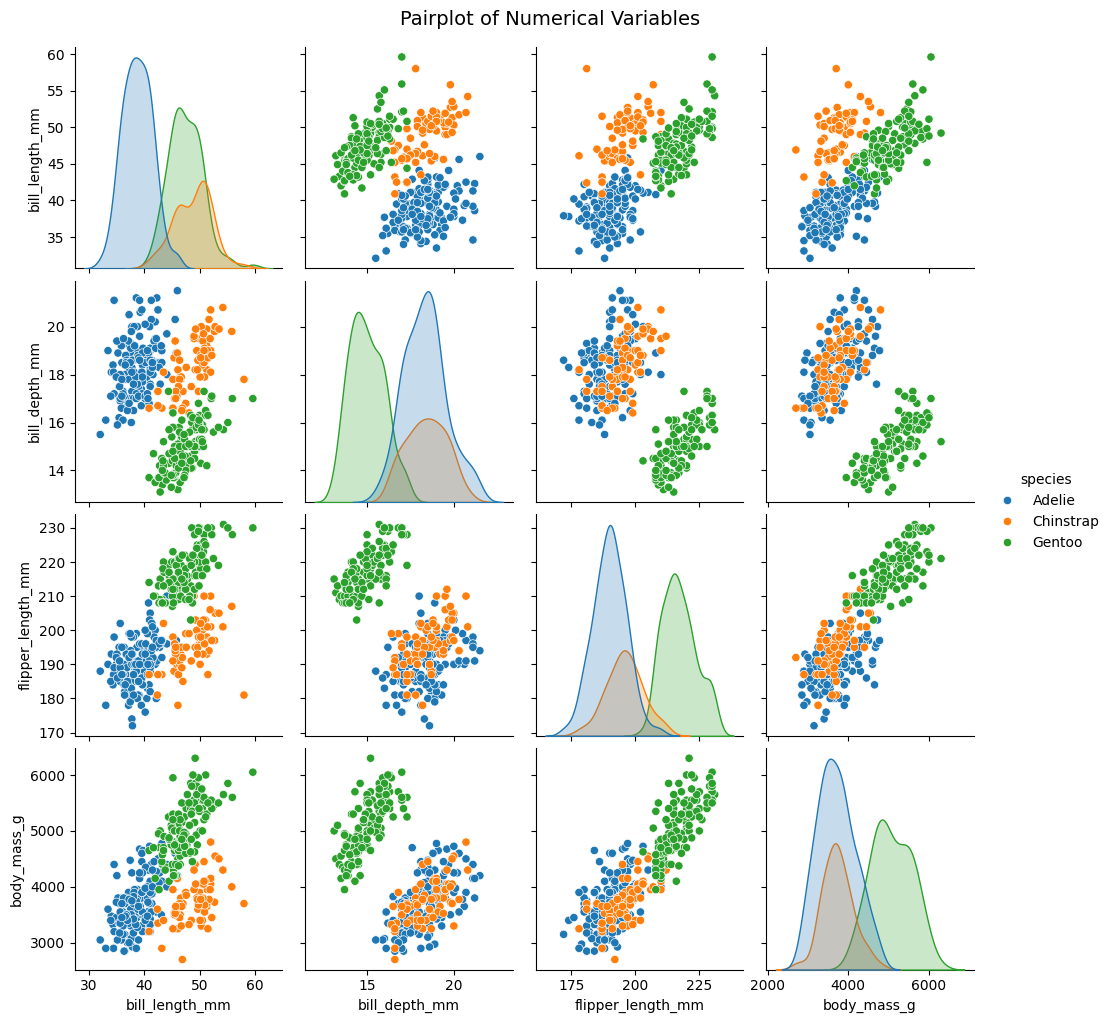

In [16]:
sns.pairplot(penguins, hue="species", diag_kind="kde")
plt.suptitle("Pairplot of Numerical Variables", fontsize=14, y=1.02)
plt.show()

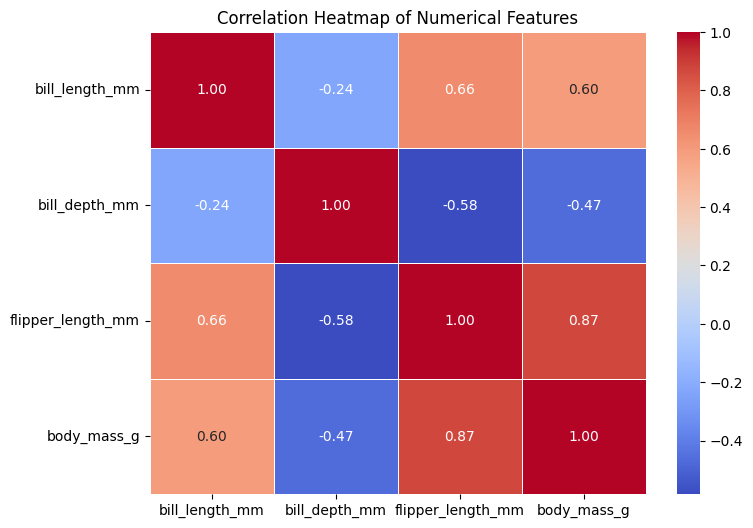

In [18]:
num_cols = penguins.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = penguins[num_cols].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

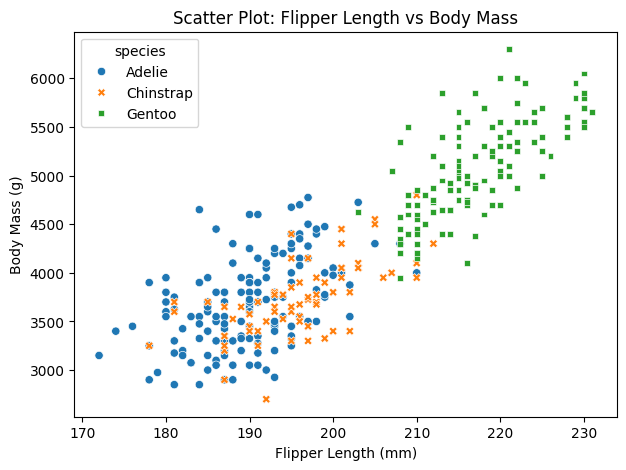

In [19]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="body_mass_g", hue="species", style="species")
plt.title("Scatter Plot: Flipper Length vs Body Mass")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.show()


C:\Users\Nisha\AppData\Local\Temp\ipykernel_34072\2817118220.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=penguins, x="species", y="body_mass_g", palette="pastel")


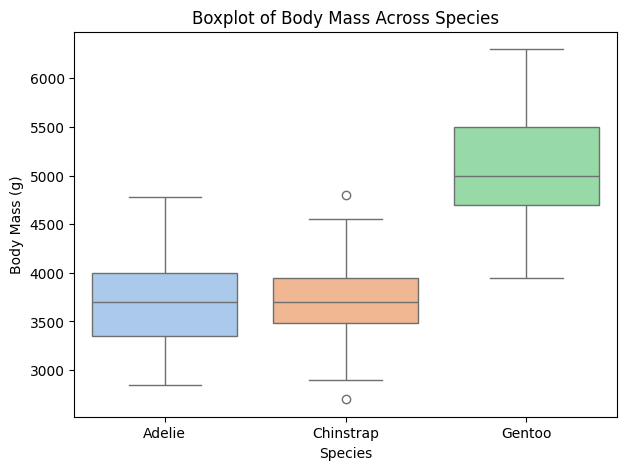

In [20]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=penguins, x="species", y="body_mass_g", palette="pastel")
plt.title("Boxplot of Body Mass Across Species")
plt.xlabel("Species")
plt.ylabel("Body Mass (g)")
plt.show()

C:\Users\Nisha\AppData\Local\Temp\ipykernel_34072\3411289001.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=penguins, x="species", y="flipper_length_mm", palette="muted", inner="quartile")


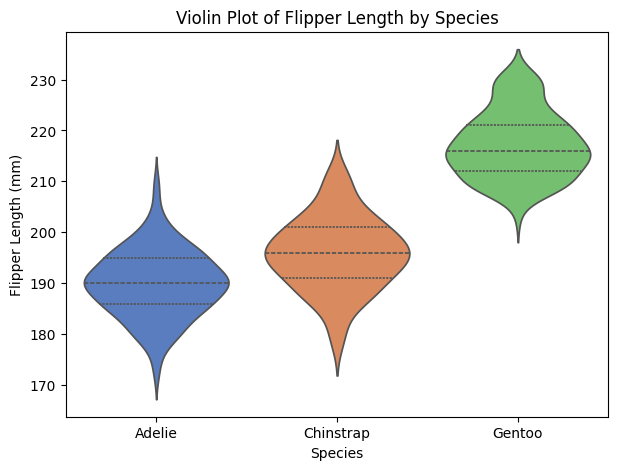

In [21]:
plt.figure(figsize=(7, 5))
sns.violinplot(data=penguins, x="species", y="flipper_length_mm", palette="muted", inner="quartile")
plt.title("Violin Plot of Flipper Length by Species")
plt.xlabel("Species")
plt.ylabel("Flipper Length (mm)")
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 

In [27]:
features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g", "island", "sex"]
target = "species"

# Drop rows with missing values to avoid errors
penguins = penguins.dropna()

# Separate features and target
X = penguins[features]
y = penguins[target]

In [29]:
label_encoders = {}  # Store encoders for future reference

for col in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()  # ✅ No more NameError
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le 

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [32]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (266, 6)
Shape of X_test: (67, 6)
Shape of y_train: (266,)
Shape of y_test: (67,)


In [39]:
from sklearn.preprocessing import StandardScaler

# 22. Apply StandardScaler to scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.select_dtypes(include=['float64', 'int64']))  # Scale only numerical columns




In [40]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.select_dtypes(include=['float64', 'int64']).columns)


In [41]:
print("Standardized Data (Z-score Scaling):")
print(X_scaled_df.head())


Standardized Data (Z-score Scaling):
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g    island  \
0       -0.896042       0.780732          -1.426752    -0.568475  1.889392   
1       -0.822788       0.119584          -1.069474    -0.506286  1.889392   
2       -0.676280       0.424729          -0.426373    -1.190361  1.889392   
3       -1.335566       1.085877          -0.569284    -0.941606  1.889392   
4       -0.859415       1.747026          -0.783651    -0.692852  1.889392   

        sex  
0  0.991031  
1 -1.009050  
2 -1.009050  
3 -1.009050  
4  0.991031  


In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler_minmax = MinMaxScaler()
X_normalized = scaler_minmax.fit_transform(X.select_dtypes(include=['float64', 'int64']))  # Normalize only numerical columns

In [44]:
X_normalized_df = pd.DataFrame(X_normalized, columns=X.select_dtypes(include=['float64', 'int64']).columns)


In [45]:
print("\nNormalized Data (Min-Max Scaling):")
print(X_normalized_df.head())


Normalized Data (Min-Max Scaling):
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  island  sex
0        0.254545       0.666667           0.152542     0.291667     1.0  1.0
1        0.269091       0.511905           0.237288     0.305556     1.0  0.0
2        0.298182       0.583333           0.389831     0.152778     1.0  0.0
3        0.167273       0.738095           0.355932     0.208333     1.0  0.0
4        0.261818       0.892857           0.305085     0.263889     1.0  1.0
